In [2]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [3]:
Tesla = yf.Ticker("TSLA")
tesla_data = Tesla.history(period="max")
df=tesla_data
df.reset_index(inplace=True)
df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [29]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
response = requests.get(url)

html_data = response.text

In [30]:
soup = BeautifulSoup(html_data, 'html.parser')

In [31]:
table = soup.find_all("tbody")[1]

# Initialize lists to store data
dates = []
revenues = []

# Loop through rows and columns in the table
for row in table.find_all('tr'):
    columns = row.find_all('td')
    if len(columns) == 2:
        date = columns[0].get_text(strip=True)
        revenue = columns[1].get_text(strip=True)

        # Append data to lists
        dates.append(date)
        revenues.append(revenue)

# Create a DataFrame named tesla_revenue
tesla_revenue = pd.DataFrame({
    'Date': dates,
    'Revenue': revenues
})

In [32]:
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$',"")

/var/folders/px/yhcbpgrs1hv_2v25cgzl51w00000gn/T/ipykernel_4623/349343550.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$',"")


In [33]:
tesla_revenue.dropna(inplace=True)

tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

In [34]:
tesla_revenue.tail()

,Date,Revenue
48,2010-09-30,31
49,2010-06-30,28
50,2010-03-31,21
52,2009-09-30,46
53,2009-06-30,27


In [13]:
GME= yf.Ticker("GME")
GME_share_price_data = GME.history(period="max")
df=GME_share_price_data
df.reset_index(inplace=True)
df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691666,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683251,1.687459,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


In [35]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
response = requests.get(url)

html_data = response.text

In [36]:
soup = BeautifulSoup(html_data, 'html.parser')

In [37]:
table = soup.find_all("tbody")[1]

# Initialize lists to store data
dates = []
revenues = []

# Loop through rows and columns in the table
for row in table.find_all('tr'):
    columns = row.find_all('td')
    if len(columns) == 2:
        date = columns[0].get_text(strip=True)
        revenue = columns[1].get_text(strip=True)

        # Append data to lists
        dates.append(date)
        revenues.append(revenue)

# Create a DataFrame named gme_revenue
gme_revenue = pd.DataFrame({
    'Date': dates,
    'Revenue': revenues
})

In [38]:
gme_revenue["Revenue"] = gme_revenue['Revenue'].str.replace(',|\$',"")

gme_revenue.dropna(inplace=True)

gme_revenue = gme_revenue[gme_revenue['Revenue'] != ""]
gme_revenue.tail()

/var/folders/px/yhcbpgrs1hv_2v25cgzl51w00000gn/T/ipykernel_4623/3823391080.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  gme_revenue["Revenue"] = gme_revenue['Revenue'].str.replace(',|\$',"")


,Date,Revenue
57,2006-01-31,1667
58,2005-10-31,534
59,2005-07-31,416
60,2005-04-30,475
61,2005-01-31,709


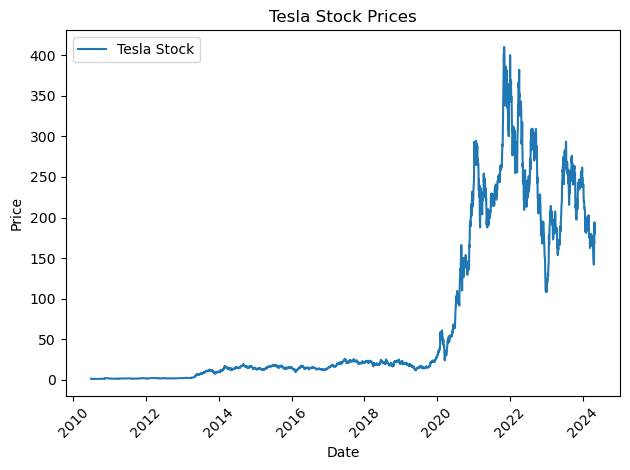

In [19]:
import matplotlib.pyplot as plt

# Convert 'Date' column to datetime format
tesla_data['Date'] = pd.to_datetime(tesla_data['Date'])

# Plot Tesla stock data
plt.plot(tesla_data['Date'], tesla_data['Close'], label='Tesla Stock')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Tesla Stock Prices')
plt.legend()
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


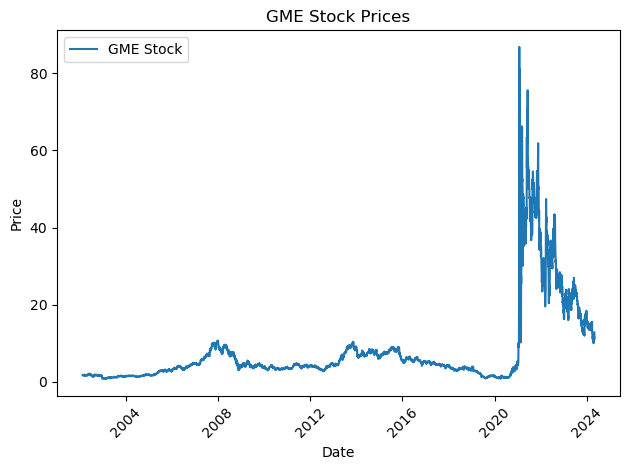

In [20]:
GME_share_price_data['Date'] = pd.to_datetime(GME_share_price_data['Date'])

# Plot Tesla stock data
plt.plot(GME_share_price_data['Date'], GME_share_price_data['Close'], label='GME Stock')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('GME Stock Prices')
plt.legend()
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()